In [1]:
import pandas as pd
import numpy as np
import datetime
import re

In [2]:
srcdir = 'problems/pod2_stl/pod2_first_experiment/'

In [3]:
def open_csv(filename):
    dateparse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z')
    df0 = pd.read_csv(srcdir + filename,
        sep=';',
        parse_dates=['Time'],
        index_col='Time',
        date_parser=dateparse)
    df0 = df0.interpolate(method='linear', limit_direction='both').resample('1min').last()
    try:
        df0 = df0.rename(columns=lambda x: re.search('p\d{2}r\d{2}c\d{2}srv\d{2}', x).group(0))
    except:
        pass
    return df0

In [4]:
# df = open_csv('power_rack01.csv')
df = open_csv('cooler_fan_signal01.csv')

In [5]:
df

,signal_default,signal_max_1,signal_max_2,signal_min
Time,,,,
2019-10-01 08:00:00+02:00,35.5,90,90.0,10.0
2019-10-01 08:01:00+02:00,34.4,90,90.0,10.0
2019-10-01 08:02:00+02:00,34.9,90,90.0,10.0
2019-10-01 08:03:00+02:00,34.2,90,90.0,10.0
2019-10-01 08:04:00+02:00,35.2,90,90.0,10.0
...,...,...,...,...
2019-10-01 17:55:00+02:00,35.6,90,90.0,10.0
2019-10-01 17:56:00+02:00,35.6,90,90.0,10.0
2019-10-01 17:57:00+02:00,35.3,90,90.0,10.0


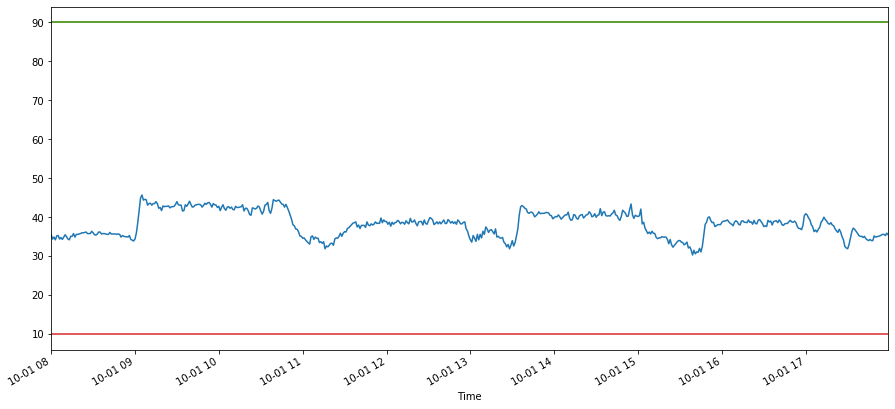

In [6]:
df.plot(figsize=(15, 7), legend=False)